exercise 1: Annotated Line Graph for Temperature Records
Objective: Design a line graph illustrating temperature fluctuations in a specific city.
Tasks:
Use a real-world dataset of temperature records.
Highlight extreme temperature events with annotations.
Add titles, labels, and legends to enhance clarity.
Explain the insights gained from the visualization.


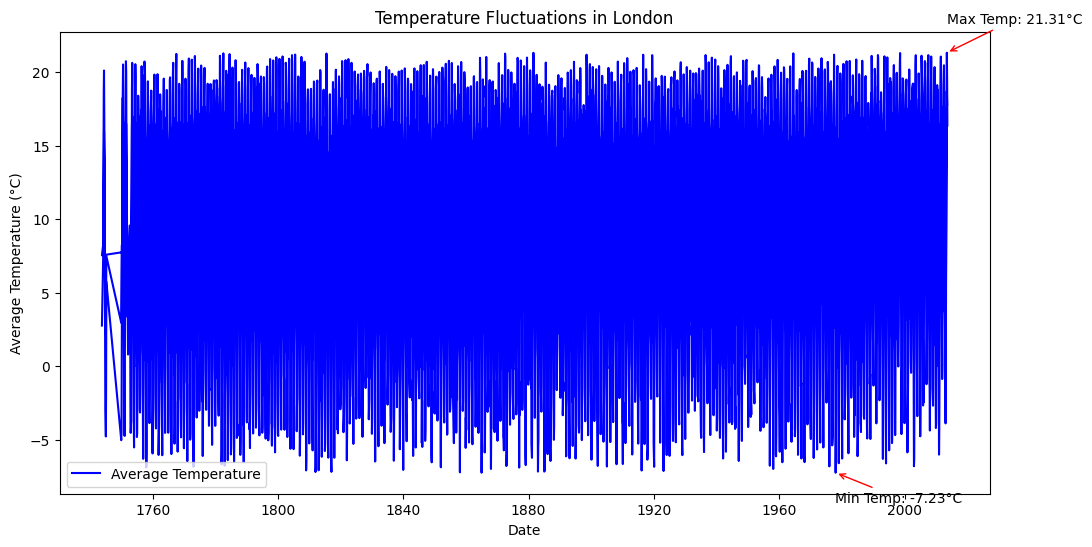

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
path = kagglehub.dataset_download("berkeleyearth/climate-change-earth-surface-temperature-data")
df=pd.read_csv(path+"/GlobalLandTemperaturesByCity.csv")
df['dt'] = pd.to_datetime(df['dt'])
df = df.dropna(subset=['AverageTemperature'])
df = df[df['City'] == 'London']
df = df[df['AverageTemperature'] < df['AverageTemperature'].quantile(0.99)]
df = df[df['AverageTemperature'] > df['AverageTemperature'].quantile(0.01)]

plt.figure(figsize=(12, 6))
plt.plot(df['dt'], df['AverageTemperature'], label='Average Temperature', color='blue')
max_temp_date = df['dt'][df['AverageTemperature'].idxmax()]
max_temp_value = df['AverageTemperature'].max()
plt.annotate(f'Max Temp: {max_temp_value:.2f}°C',
             xy=(max_temp_date, max_temp_value),
             xytext=(max_temp_date + pd.DateOffset(months=1), max_temp_value + 2),
             arrowprops=dict(arrowstyle='->', color='red'))
min_temp_date = df['dt'][df['AverageTemperature'].idxmin()]
min_temp_value = df['AverageTemperature'].min()
plt.annotate(f'Min Temp: {min_temp_value:.2f}°C',
             xy=(min_temp_date, min_temp_value),
             xytext=(min_temp_date - pd.DateOffset(months=1), min_temp_value - 2),
             arrowprops=dict(arrowstyle='->', color='red'))
plt.title('Temperature Fluctuations in London')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.show()

Exercise 2: Hierarchical Filtering and Visualization
Objective: Extract and analyze temperature data for a specific state, city, and date range.
Tasks:
Use a dataset with hierarchical indexing (‘Country’, ‘State’, ‘City’, ‘Date’).
Filter data based on user-defined criteria.
Calculate the average temperature for the selected range.
Visualize the results using an appropriate graph (e.g., line or bar chart).
Provide Python code and a detailed explanation of the process.


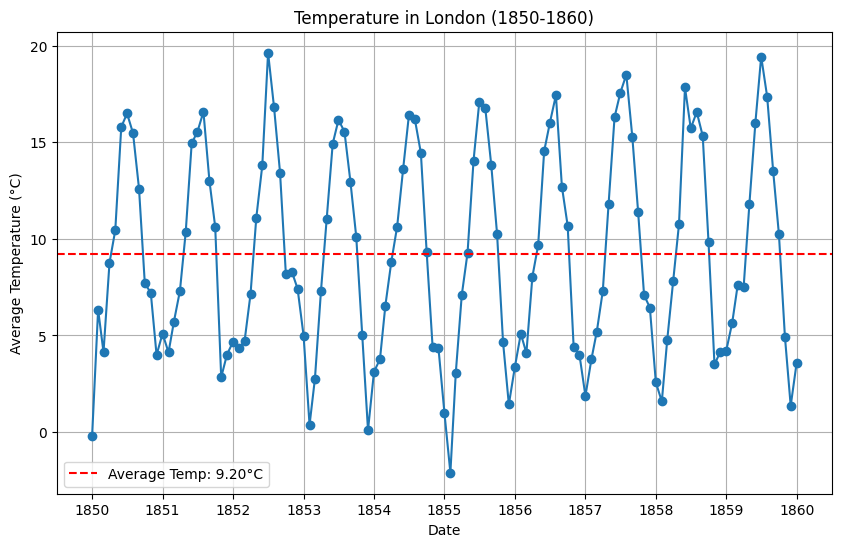

Average Temperature for London between 1850-01-01 00:00:00 and 1860-01-01 00:00:00: 9.20°C


In [47]:
df = df.set_index(['Country', 'City', 'dt'])
filtered_df = df.loc[('United Kingdom', 'London')]
start_date = pd.to_datetime('1850-01-01')
end_date = pd.to_datetime('1860-01-01')
filtered_df = filtered_df[(filtered_df.index.get_level_values('dt') >= start_date) &
                        (filtered_df.index.get_level_values('dt') <= end_date)]
average_temp = filtered_df['AverageTemperature'].mean()

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(filtered_df.index.get_level_values('dt'), filtered_df['AverageTemperature'], marker='o')
plt.axhline(y=average_temp, color='r', linestyle='--', label=f'Average Temp: {average_temp:.2f}°C')

plt.title('Temperature in London (1850-1860)')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()
print(f"Average Temperature for London between {start_date} and {end_date}: {average_temp:.2f}°C")


Exercise 3: Dynamic Subplot Configuration with User Interaction
Objective: Create a script that dynamically generates subplots based on user input.
Tasks:
Prompt the user to enter the number of plots (up to 9).
Configure subplots in a 3x3 grid layout.
Generate different plot types (line, scatter, bar, histogram) with random data.
Add titles, labels, and legends to each subplot.
Use Tkinter or another library for user interaction.



Enter the number of plots (up to 9): 2


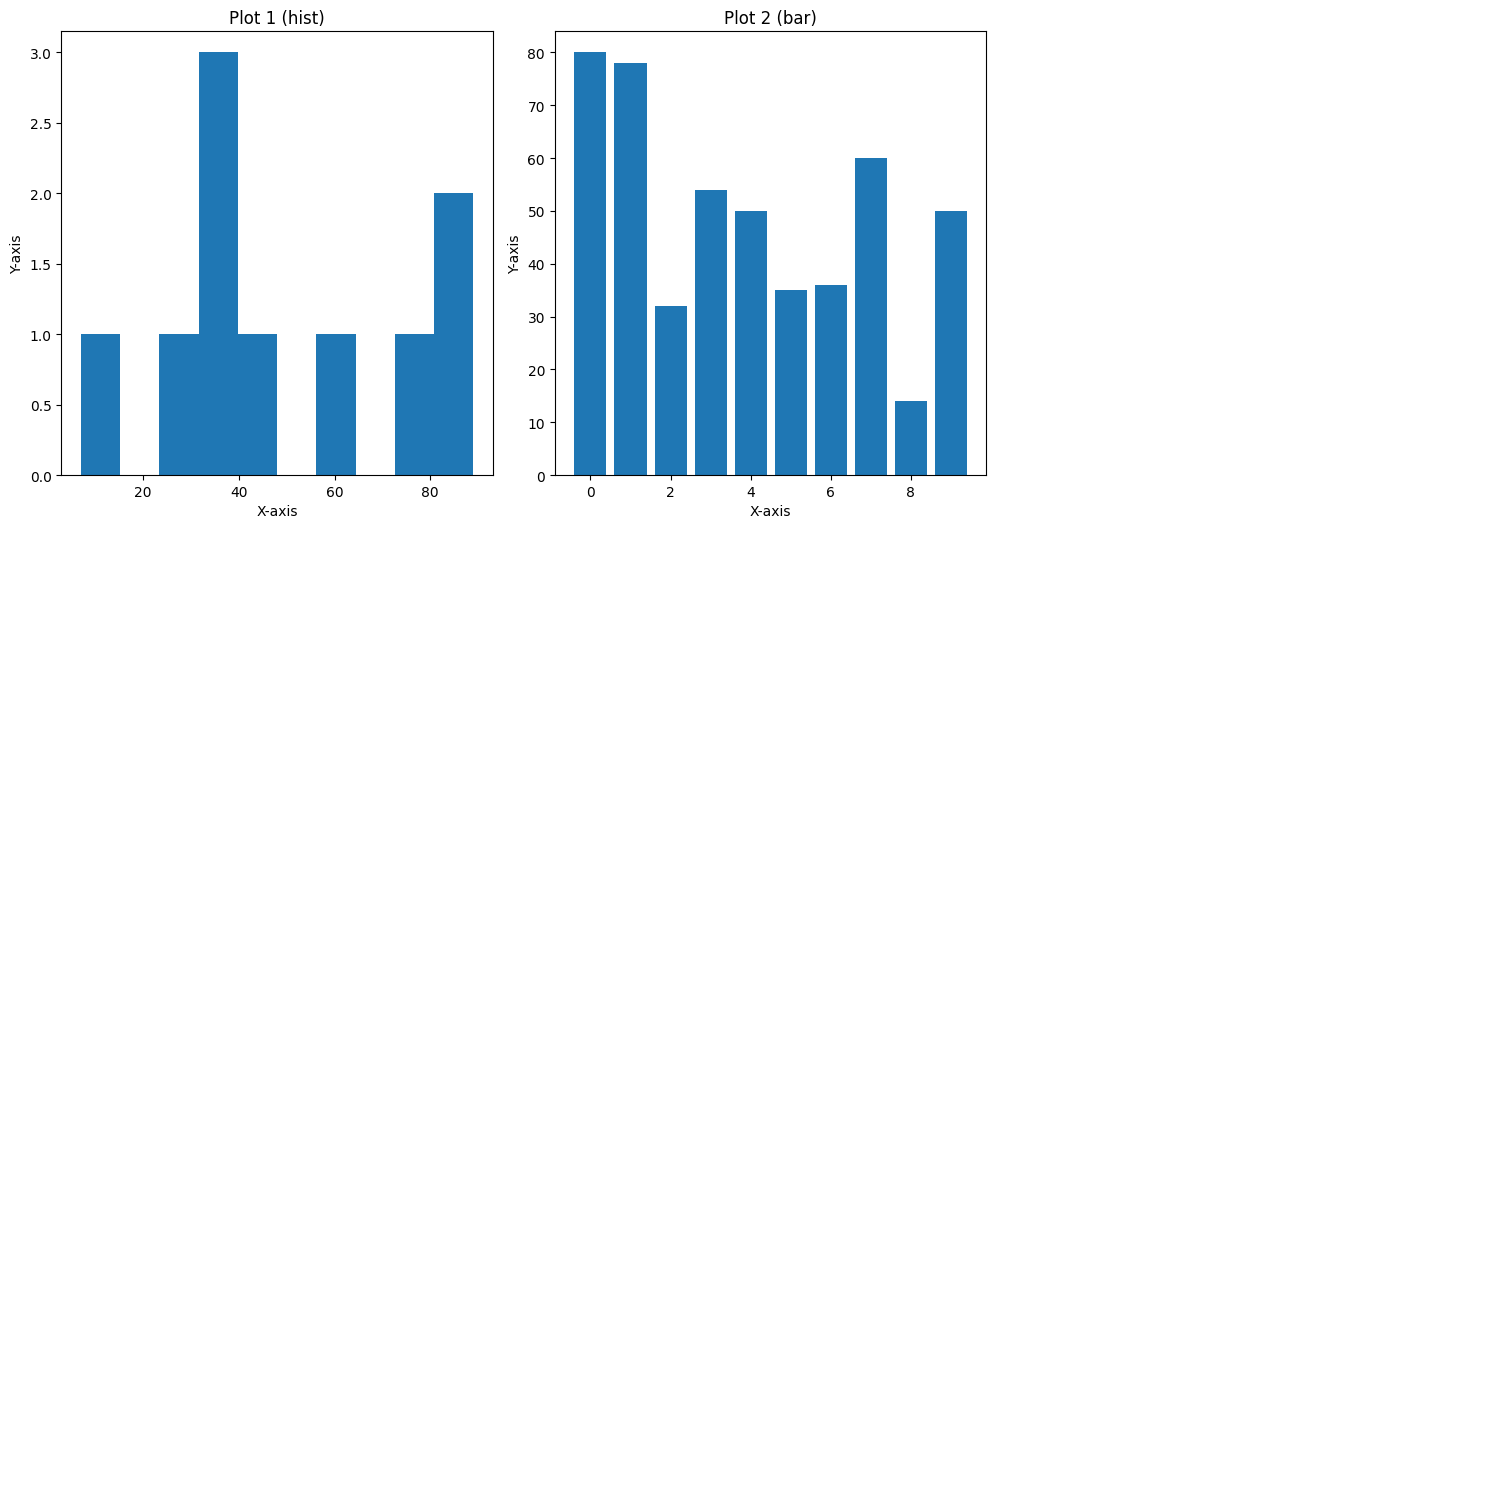

In [48]:
import matplotlib.pyplot as plt
import random
def dynamic_subplots():
    num_plots = int(input("Enter the number of plots (up to 9): "))
    if not 1 <= num_plots <= 9:
        print("Invalid input. Please enter a number between 1 and 9.")
        return

    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()

    for i in range(num_plots):
        plot_type = random.choice(['line', 'scatter', 'bar', 'hist'])
        x = range(10)
        y = [random.randint(1, 100) for _ in range(10)]

        if plot_type == 'line':
            axes[i].plot(x, y)
        elif plot_type == 'scatter':
            axes[i].scatter(x, y)
        elif plot_type == 'bar':
            axes[i].bar(x, y)
        elif plot_type == 'hist':
            axes[i].hist(y)

        axes[i].set_title(f'Plot {i+1} ({plot_type})')
        axes[i].set_xlabel('X-axis')
        axes[i].set_ylabel('Y-axis')

    # Turn off any unused subplots
    for i in range(num_plots, 9):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()
dynamic_subplots()

Exercise 4: Multi-Dimensional Analysis of Wine Characteristics
Objective: Analyze wine prices by country, vintage, and alcohol content using multi-dimensional plots.
Tasks:
Filter the dataset to include wines from the top 5 countries by listings.
Group data by country and vintage, calculating average price (PLN) and alcohol content (%).
Use Seaborn’s FacetGrid to create scatter plots for each country, with:
Vintage on the x-axis.
Average price on the y-axis.
Point size representing alcohol content (%).
Add titles and legends to the plots.


                    winery             wine  year  rating  num_reviews  \
0            Teso La Monja            Tinto  2013     4.9           58   
1                   Artadi    Vina El Pison  2018     4.9           31   
2             Vega Sicilia            Unico  2009     4.8         1793   
3             Vega Sicilia            Unico  1999     4.8         1705   
4             Vega Sicilia            Unico  1996     4.8         1309   
...                    ...              ...   ...     ...          ...   
7495               Contino          Reserva  2016     4.2          392   
7496  Conreria d'Scala Dei    Les Brugueres  2018     4.2          390   
7497           Mustiguillo  Finca Terrerazo  2017     4.2          390   
7498           Matarromera     Gran Reserva  2011     4.2          389   
7499              Sei Solo         Preludio  2016     4.2          388   

     country            region   price                  type  body  acidity  
0     Espana              Toro  9

TypeError: <lambda>() missing 1 required positional argument: 's'

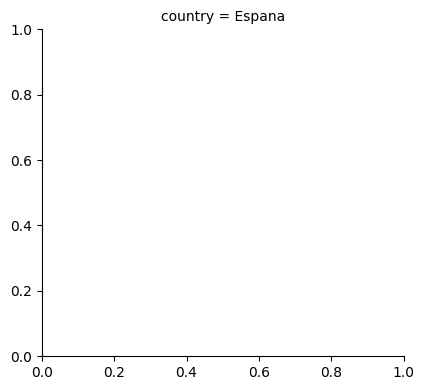

In [80]:
try:
    wine_df = pd.read_csv('wine.csv')
except FileNotFoundError:
    print("Error: 'wine_data.csv' not found. Please upload the file or provide the correct path.")
    exit()
# Filter for top 5 countries
top_countries = wine_df['country'].value_counts().nlargest(5).index
filtered_df = wine_df[wine_df['country'].isin(top_countries)]
print(filtered_df)
# Group data
grouped_df = filtered_df.groupby(['country', 'type'])[['price', 'body']].mean().reset_index()
# Create FacetGrid for scatter plots
g = sns.FacetGrid(grouped_df, col='country', col_wrap=3, height=4)
g.map(plt.scatter, 'type', 'price', s='acidity' , alpha=0.7)
# Customize plots
g.set_axis_labels("Vintage", "Average Price (PLN)")
g.set_titles("{col_name}")
g.fig.suptitle("Wine Prices by Country and Vintage", y=1.02)
for ax in g.axes.flat:
    ax.legend(['Alcohol Content (%)'], loc='upper left')
plt.show()


Exercise 5: Predicting Wine Prices with Machine Learning
Objective: Build a predictive model for wine prices.
Tasks:
Preprocess the dataset (encode categorical variables, handle missing values, normalize).
Split data into training and testing sets.
Train a regression model (e.g., linear regression, random forest).
Evaluate the model using metrics such as RMSE and R².
Visualize predicted vs. actual prices with a scatter plot.


<ipython-input-81-10bcdb5cedd3>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wine_df[col].fillna(wine_df[col].mode()[0], inplace=True)
<ipython-input-81-10bcdb5cedd3>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

RMSE: 84.36497515042352
R-squared: 0.7486048815393173


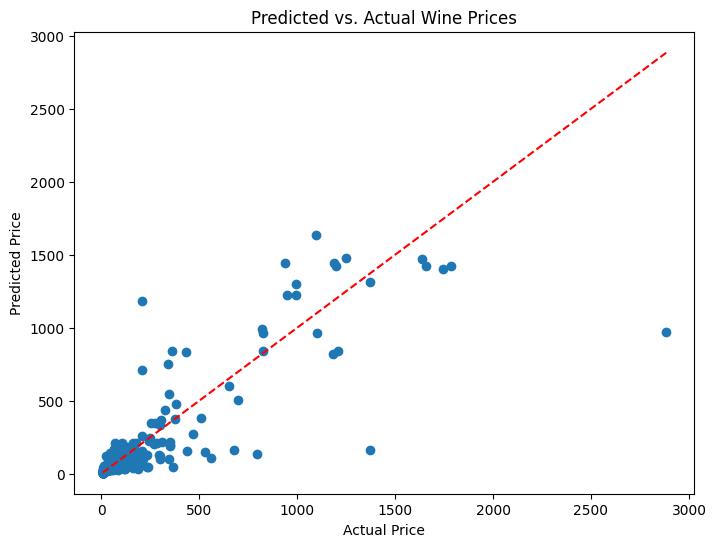

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

for col in wine_df.columns:
    if pd.api.types.is_numeric_dtype(wine_df[col]):
        wine_df[col].fillna(wine_df[col].mean(), inplace=True)
    else:
        wine_df[col].fillna(wine_df[col].mode()[0], inplace=True)
X = wine_df.drop('price', axis=1)
y = wine_df['price']

# 3. Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=np.number).columns

# 4. Create preprocessing pipelines
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# 5. Create and train the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))  # You can change the model here
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)


# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')
# Visualization: Predicted vs. Actual Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs. Actual Wine Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line
plt.show()

Exercise 6: Clustering Analysis to Identify Similar Wines
Objective: Perform clustering to group wines based on key features.
Tasks:
Preprocess data (handle missing values, normalize features).
Apply a clustering algorithm (e.g., K-means, hierarchical clustering).
Determine the optimal number of clusters using methods like the elbow method or silhouette score.
Visualize clusters using PCA (2D or 3D plot).
Analyze and interpret the characteristics of each cluster.


In [90]:
from sre_constants import error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
wine_df['year'] = pd.to_numeric(wine_df['year'],error='coerce')
wine_df['year'].fillna(wine_df['year'].mean(), inplace=True)
features_for_clustering = ['body', 'acidity', 'year']
X_cluster = wine_df[features_for_clustering]
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Determine optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply KMeans clustering with the chosen k (e.g., k=3 based on the elbow plot)
optimal_k = 3 #Replace with the optimal k found using the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
wine_df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=wine_df['cluster'], palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Wine Clusters visualized using PCA')
plt.show()

# Analyze cluster characteristics
for cluster_num in range(optimal_k):
    print(f"Cluster {cluster_num}:")
    print(wine_df[wine_df['cluster'] == cluster_num][features_for_clustering].describe())
    print("\n")
X_scaled = scaler.fit_transform(X_cluster)




<ipython-input-90-d2820fbdfa17>:1: DeprecationWarning: module 'sre_constants' is deprecated
  from sre_constants import error


TypeError: to_numeric() got an unexpected keyword argument 'error'